# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here

import numpy as np
import pandas as pd
from pandas import RangeIndex
from scipy import stats


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here

employee = pd.read_csv('Employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [10]:
# your answer here-1st way

employee.groupby(['Department'])['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [11]:
# your answer here-2nd way

employee.groupby(['Department'])['Salary'].agg(['mean'])


,mean
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [14]:
# your answer here

employee.pivot_table(index=["Department", "Title"], values=["Salary"], aggfunc=np.mean)


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [18]:
# your answer here

employee.pivot_table(index=["Title"], values=["Salary"], aggfunc=np.mean)


,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [54]:
# your answer here

employee.pivot_table(index=["Department", "Title", "Name"], values=["Years", "Salary"], aggfunc=np.mean)


Salary  Years
Department Title     Name                 
HR         VP        Ana         70      8
           analyst   David       30      2
                     Sonia       35      4
IT         VP        Carlos      70      8
           analyst   Jose        35      1
                     Maria       30      2
           associate Pedro       60      7
Sales      associate Eva         55      2
                     Samuel      55      3

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [58]:
# your answer here

df = employee.groupby(['Department', 'Title'])['Salary'].agg(['median', 'min', 'max', 'std'])
df


median  min  max       std
Department Title                                
HR         VP           70.0   70   70       NaN
           analyst      32.5   30   35  3.535534
IT         VP           70.0   70   70       NaN
           analyst      32.5   30   35  3.535534
           associate    60.0   60   60       NaN
Sales      associate    55.0   55   55  0.000000

In [ ]:
# I used the standard aggregation functions.
# We can see that some std values are NaN.

#### Based on your comments, fill the missing values with an appropriate value

In [61]:
# your answer here

df.fillna(df.std(), inplace = True)
df


median  min  max       std
Department Title                                
HR         VP           70.0   70   70  2.041241
           analyst      32.5   30   35  3.535534
IT         VP           70.0   70   70  2.041241
           analyst      32.5   30   35  3.535534
           associate    60.0   60   60  2.041241
Sales      associate    55.0   55   55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [62]:
# your answer here

employee.pivot_table(index=["Department"], columns=["Name"], values=["Salary"], fill_value=0)


Salary                                               
Name          Ana Carlos David Eva Jose Maria Pedro Samuel Sonia
Department                                                      
HR             70      0    30   0    0     0     0      0    35
IT              0     70     0   0   35    30    60      0     0
Sales           0      0     0  55    0     0     0     55     0

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [65]:
# your answer here

employee.pivot_table(index=["Department"], columns=["Title"], values=["Salary", "Years"], aggfunc=np.mean, fill_value=0)



Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR             70    32.5         0     8     3.0       0.0
IT             70    32.5        60     8     1.5       7.0
Sales           0     0.0        55     0     0.0       2.5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [66]:
# your answer here

fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [72]:
# your answer here

fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [68]:
# your answer here

fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [74]:
# your answer here

# A correlation closer to 1 means a strong positive linear relationship between the two variables.

fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

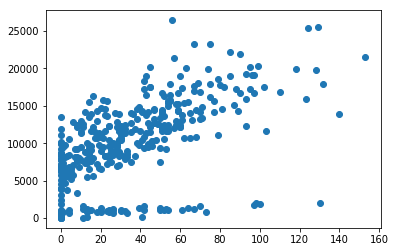

In [76]:
# your answer here

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])


#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here

# The dots seem to stick to a straight and diagonal line, the correlation is visible.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [77]:
# your answer here

fitbit['Minutes Sedentary'].corr(fitbit['Steps'])


0.07690608062990094

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

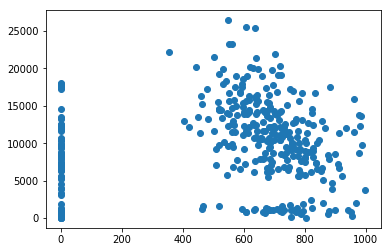

In [78]:
# your answer here

plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])


In [80]:
# Your comment here

# The linear correlation is not visible and cannot be proved.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [81]:
# your answer here

fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

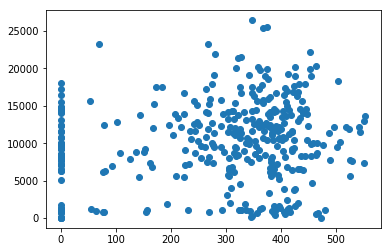

In [83]:
# your answer here

plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])

# The correlation is not very obvious and cannot be proved.


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [87]:
# your answer here

column = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

cor_fit = fitbit[column].corr()


In [88]:
#Print cor_fit

cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [90]:
# your answer here

cor_fit.sort_values(by=['Steps'], ascending=False)

# The highly correlated features with the variable Steps are :
# 1) Minutes Very Active
# 2) Floors
# 3) Calorie burned


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [92]:
# your answer here

time_grades = pd.read_csv('Time_Grades.csv')


In [95]:
#Print time_grades

time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D8FE39E8>,
      dtype=object)

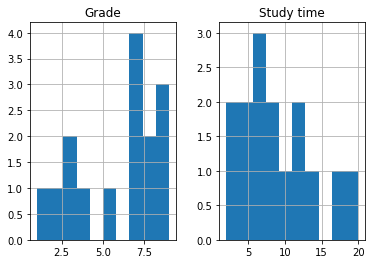

In [96]:
# your answer here

time_grades.hist()


#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [110]:
# your answer here-Pearson

pearson = time_grades.corr()
pearson

# There is a good correlation (0.79) between time and grades.

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [111]:
# your answer here-Spearman

spearman = time_grades.corr(method='spearman')
spearman

# The correlation is even stronger with the Spearman method (0.81 against 0.79 for the Pearson's method).

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

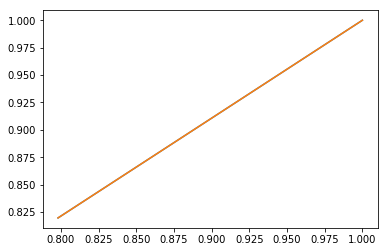

In [122]:
# your answer here

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(pearson, spearman)


In [109]:
# your comment here

# The 2 variables are similar. There is a positive correlation.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
# your comment here

'''
Le coefficient de corrélation de Pearson mesure une corrélation linéaire entre deux variables.

Dans le cas ou la méthode utilisée est de type Spearman, 
les statistiques rho de Spearman sont utilisées pour estimer le coefficient de corrélation 
basé sur le rang. Ce sont des tests statistiques dits robustes car ils ne dépendent pas de 
la distribution des données. 

Le test de corrélation de Spearman est recommandé lorsque les variables 
ne suivent pas une loi normale.

'''